# Statistics: Test a Perceptual Phenomenon

> Udacity Data Analyst Nanodegree: _Project 1_
>
> Author: _Ke Zhang_
>
> Submission Date: _2017-03-28_ (Revision 1)

## Background Information

In a [Stroop task](https://en.wikipedia.org/wiki/Stroop_effect), participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red">RED</span>, <span style="color:blue">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:green">PURPLE</span>, <span style="color:purple">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.


## Questions For Investigation

> As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

**Question 1: What is our independent variable? What is our dependent variable?**

**Answer**: 
* Independent variables: the two congruence conditions on recognizing word/ink colors (_congruent_ vs _incongruent_)
* Dependent variables: reaction times (in seconds) between the congruent and incongruent conditions

**Question 2: What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.**

**Answer 2a**: 
* Null and alternative hypotheses:
    * \\(μ_C\\): population mean of reading time on _Congruent_ words
    * \\(μ_I\\): population mean of reading time on _Incongruent_ words
    * \\(μ_D\\): \\(μ_D = μ_I - μ_C\\), population mean of differences in reading times between the two congruence groups 
    * **\\(H_0\\)**: The congruence conditions have _no effect_ on the mean reading times. The means of the two related congruence groups are effectively identical.
        > \\(H_0\\): \\(μ_C = μ_I\\) or \\(μ_D = 0\\)
    * **\\(H_1\\)**: The mean reading times _depend on_ the congruence conditions. The means of the two related groups differ from each other.
        > \\(H_1\\): \\(μ_C \neq μ_I\\) or \\(μ_D \neq 0\\)

**Answer 2b**: 
* Select an appropriate statistical test:
    * Expected statistical test: a 2-tailed dependent t-test to determine whether the means of the two congruence groups are equal:
        * The sample cases are collected independently and normal distributions are assumed (see Answer 4). 
            --> choice between a z- or t-test.
        * The sample size is below 30 (only 24 samples) and the population standard deviation is unknown. 
            --> z-test excluded. Only conditions for t-test apply.
        * The hypothesis is not directional. Deviations in both directions are theoretically possible.
            --> 2-tailed
        * The test compares the means of dependent samples with repeated measures on the two groups.
            --> paired-samples dependent t-test
    * The 2-tailed dependent t-test is defined as:
    > Test statistic: $$t_{statistic} = \frac{\bar{X_{D}}}{SE_{D}}$$ 
    >
    > Standard error: $$SE_{D} = \frac{S_{D}}{\sqrt{n}}$$
    >
    > Sample size: $$n = 24$$
    >
    > Degrees of freedom: $$df = 23$$
    >
    > Significance level: $$α = 0.05$$
    > 
    > Critical value: $$t_{critical} = t_{1-\frac{α}2,df}$$
    >
    > Critical region: $$|t_{statistic}| > t_{critical}$$

**Q3**: Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

**Answer**: 
Descriptive statistics (computed from the calculation steps below):

|        | Congruent | Incongruent | Difference |
|--------|-----------|-------------|------------|
| count  | 24        | 24          | 24         |
| min    | 8.6300    | 15.687      | 1.9500    |
| 25%    | 11.895    | 18.717      | 3.6455    |
| median | 14.357    | 21.018      | 7.6665    |
| **mean**   | 14.051    | 22.016      | **7.9648**    |
| 75%    | 12.669    | 23.012      | 10.259     |
| max    | 22.328    | 35.255      | 21.919    |
| var    | 12.669    | 23.012      | 23.667     |
| **std**    | 3.5594    | 4.7971      | **4.8648**     |
| SE     | .72655   | .97920     | .99302 |

In [1]:
# import libs used in this project
import math
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# initialize plot context and global configurations
%matplotlib inline
sns.set(style='white', palette='muted', color_codes=True)
sns.set_context('notebook', font_scale=1.2, rc={'lines.linewidth': 1.2})


In [2]:
# prepare and preview data
df = pd.read_csv('./stroopdata.csv')
df['Difference'] = df['Incongruent'] - df['Congruent']

# print dataframe
df

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134
5,12.238,20.878,8.640
6,14.692,24.572,9.880
7,8.987,17.394,8.407
8,9.401,20.762,11.361
9,14.480,26.282,11.802


In [3]:
# show statistics
df.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


In [4]:
# sample variance
df.var()

Congruent      12.669029
Incongruent    23.011757
Difference     23.666541
dtype: float64

In [5]:
# sample standard error
df.std() / math.sqrt(len(df))

Congruent      0.726551
Incongruent    0.979195
Difference     0.993029
dtype: float64

**Q4**: Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

**Answer**: The plot below shows histograms, kernel density functions (KDE) and means of the two congruency conditions and their differences respectively. 

Observations in the plot:
> **Normal**: In the "Difference Reaction Time Distribution" the KDE function has a nearly normal shape and the mean of difference (the dashed vertical line) is situated close to the peak.
>
> **Skewness**: All values in the difference histogram are positive. The KDE function is left skewed (more values to the right of the distribution)
>
> **Outliers**: The histogram of incongruent shows a second peak with two extreme values (near 35 seconds reaction time). In my opinion, these points are not too far away to be declared as outliers. And from a practical point of view I've experienced short blackouts during the Stroop task myself. So I'll consider the extreme values as valid and continue the analysis without removing them.

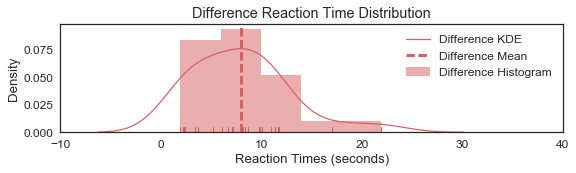

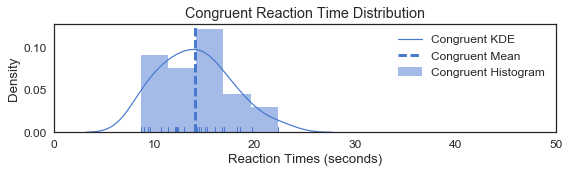

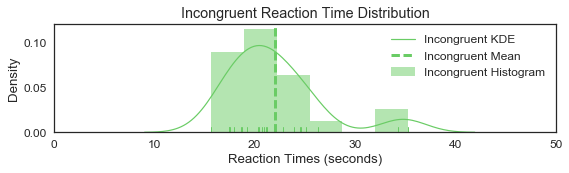

In [6]:
def plot_distribution(data, subject, color, xlim):
    """
    Draws distribution plot with histograms, kernel density plot and mean as vertical line.
    """
    sns.plt.figure(figsize=(9, 2))
    sns.plt.xlim(xlim)
    # plot the differences distribution with a histogram, kernel density estimate and rug plot    
    sns.distplot(data, 
                 label='{0} Histogram'.format(subject),
                 color=color,
                 kde=True,
                 rug=True,
                 hist_kws={'alpha': .5},
                 kde_kws={'label': '{0} KDE'.format(subject)})
    # use vline to draw the mean of differences as a vertical line
    sns.plt.axvline(data.mean(),
               label='{0} Mean'.format(subject),
               color=color,
               linestyle='dashed',
               linewidth=3)
    sns.plt.title('{0} Reaction Time Distribution'.format(subject))
    sns.plt.xlabel('Reaction Times (seconds)')
    sns.plt.ylabel('Density')
    sns.plt.legend()
    
# draw plots
plot_distribution(df['Difference'], 'Difference', 'r', [-10, 40])
plot_distribution(df['Congruent'], 'Congruent', 'b', [0, 50])
plot_distribution(df['Incongruent'], 'Incongruent', 'g', [0, 50])

sns.plt.show()

**Q5**: Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

**Answer**: 

| t-statistic | df | p-value      | \\(\bar{x_{D}}\\) | t-critical | 95% CI lower | 95% CI upper |
|:-----------:|---:|--------------|--------------|--------|----------|----------|
|     8.02    | 23 | .00000       | 7.96         | ±2.069 | 5.91     | 10.02    |

Since p<.001, we **reject** \\(H_0\\) that the means of the two congruence groups are equal and conclude that the mean reaction time of congruent group is significantly different than the average reaction time of the incongruent group.

Based on the results, we can state the following:
* There is a significant difference in mean reaction time between the congruent and incongruent groups (p < .001).
* The mean reaction time of incongruent group is statistically about 6 seconds slower than the congruent group at least.

The result matches my expectations and proves that reading time is affected by the incongruent conditions which makes participants take longer on the test. In the online test I make the same experience that the incongruent tasks are more difficult and require more time to read.


In [7]:
test_data = df['Difference']

n = len(test_data)
print('sample size: n={0}'.format(n))
print('degrees of freedom: df={0}'.format(n - 1))

a = 0.05
print('alpha-threshold: α={0}'.format(n))

mean = test_data.mean()
print('mean: {0:.2f}'.format(mean))

std = test_data.std()
print('standard deviation: {0:.2f}'.format(std))

se = std / math.sqrt(n)
print('standard error: se={0:.2f}'.format(se))

# t-table: https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg
t_crit = 2.069
print('2-tailed t-critical based on α-level and df: ±{0:.2f}'.format(t_crit))

ci_lower = mean - t_crit * se
ci_upper = mean + t_crit * se
print('95% CI: ({0:.2f}, {1:.2f})'.format(ci_lower, ci_upper))

t_statistic = mean / se
print('t-statistic: t={0:.2f}'.format(t_statistic))

p_value = stats.t.pdf(t_statistic, n - 1)
print('p-value: p={0:.10f}'.format(p_value))

cohens_d = mean / std
print("cohen's d: {0:.2f} (> 1.20 ==> very large effect size)".format(cohens_d))


sample size: n=24
degrees of freedom: df=23
alpha-threshold: α=24
mean: 7.96
standard deviation: 4.86
standard error: se=0.99
2-tailed t-critical based on α-level and df: ±2.07
95% CI: (5.91, 10.02)
t-statistic: t=8.02
p-value: p=0.0000000439
cohen's d: 1.64 (> 1.20 ==> very large effect size)


**Q6**: Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**Answer**: 

I suspect that our subconsciousness is somehow responsible for the effect observed by the Stroop task. Actually there're several theories listed on Wikipedia trying to explain this perceptual phenomenon:
* Processing speed: a lag in the brain's ability to recognize the color of the word since the brain reads words faster than it recognizes colors.
* Selective attention: color recognition as opposed to reading a word, requires more attention, the brain needs to use more attention to recognize a color than to word encoding, so it takes a little longer.
* Automaticity: since recognizing colors is not an "automatic process" there is hesitancy to respond; whereas, the brain automatically understands the meaning of words as a result of habitual reading.
* Parallel distributed processing: as the brain analyzes information, different and specific pathways are developed for different tasks.

A few variations of the Stroop task that may produce similar effects:
* Bilingualism: incongurency in animals names in different languages
* Warped Words: words printed in distorted way making it difficult to read
* Emotional: incongruence in negative and neutral emotional words


## References

* [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Matplotlib Documentation](http://matplotlib.org/index.html)
* [SciPy documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)
* [Stroop effect](https://en.wikipedia.org/wiki/Stroop_effect)
* [Udacity. T-Table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)
* [Statistics HowTo - When to use a t-score vs z-score?](http://www.statisticshowto.com/when­to­use­a­t­score­vs­z­score/)

## Reproduction Environment

In [8]:
import IPython
print IPython.sys_info()

{'commit_hash': u'5c9c918',
 'commit_source': 'installation',
 'default_encoding': 'cp936',
 'ipython_path': 'C:\\dev\\anaconda\\lib\\site-packages\\IPython',
 'ipython_version': '5.1.0',
 'os_name': 'nt',
 'platform': 'Windows-7-6.1.7601-SP1',
 'sys_executable': 'C:\\dev\\anaconda\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '2.7.13 |Anaconda 4.3.0 (32-bit)| (default, Dec 19 2016, 13:36:02) [MSC v.1500 32 bit (Intel)]'}


In [9]:
!pip freeze

alabaster==0.7.9
anaconda-client==1.6.0
anaconda-navigator==1.4.3
argcomplete==1.0.0
astroid==1.4.9
astropy==1.3
Babel==2.3.4
backports-abc==0.5
backports.shutil-get-terminal-size==1.0.0
backports.ssl-match-hostname==3.4.0.2
beautifulsoup4==4.5.3
bitarray==0.8.1
blaze==0.10.1
bokeh==0.12.4
boto==2.45.0
Bottleneck==1.2.0
cdecimal==2.3
cffi==1.9.1
chardet==2.3.0
chest==0.2.3
click==6.7
cloudpickle==0.2.2
clyent==1.2.2
colorama==0.3.7
comtypes==1.1.2
conda==4.3.11
configobj==5.0.6
configparser==3.5.0
contextlib2==0.5.4
cryptography==1.7.1
cycler==0.10.0
Cython==0.25.2
cytoolz==0.8.2
dask==0.13.0
datashape==0.5.4
decorator==4.0.11
dill==0.2.5
docutils==0.13.1
enum34==1.1.6
et-xmlfile==1.0.1
fastcache==1.0.2
Flask==0.12
Flask-Cors==3.0.2
funcsigs==1.0.2
functools32==3.2.3.post2
futures==3.0.5
gevent==1.2.1
glueviz==0.9.1
greenlet==0.4.11
grin==1.2.1
h5py==2.6.0
HeapDict==1.0.0
idna==2.2
imagesize==0.7.1
ipaddress==1.0.18
ipykernel==4.5.2
ipython==5.1.0
ipython-genutils==0.1.0
ipywidgets==5.